### Importation of librairies

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from sklearn.datasets import load_boston
    from matplotlib import rcParams
import warnings
from seaborn_qqplot import pplot
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')


### Load data

In [135]:
data=load_boston()
columns=data.feature_names
df=pd.DataFrame(data.data,columns=data.feature_names)
df["median_price"]=data.target

In [136]:
#General info from the data , to know more about features 
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu


### Exploration of data 

In [137]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [138]:
#Check if columns are in a good format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CRIM          506 non-null    float64
 1   ZN            506 non-null    float64
 2   INDUS         506 non-null    float64
 3   CHAS          506 non-null    float64
 4   NOX           506 non-null    float64
 5   RM            506 non-null    float64
 6   AGE           506 non-null    float64
 7   DIS           506 non-null    float64
 8   RAD           506 non-null    float64
 9   TAX           506 non-null    float64
 10  PTRATIO       506 non-null    float64
 11  B             506 non-null    float64
 12  LSTAT         506 non-null    float64
 13  median_price  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


- **it is clear that data doesn't contain any null or Nan values, anc columns are in the appropriate format**

In [139]:
## some summary statistics
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,median_price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [140]:
#check for duplicated data
df.duplicated().sum()

0

<p style="font-size:20px;text-align:center">general thoughts about duplicated values and distribution of variables</p><br>
<div style="border-style:solid;padding:10px"><b>
-There is no duplicated data in our dataset,in general the inclusion of duplicated data , may not have an impact in the model,but it is a good practice to get rid of them <br>
-let's visualise our data to check the distribution of variables ,and reveal outliers if there are any<br>

-This  phase is important , because knowing the distribution of variable will tell us which type of tests to run on our data , like for example , to check for the effect of a variable on another one using ANOVA  as an example, if the data is not normally distributed we are more likely to go for a non parametric test ,bcs we will probably get misleading results .

-Also revealing outliers is important, because it may influence badly the accuracy  of our model.</b>
</div>




array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'median_price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

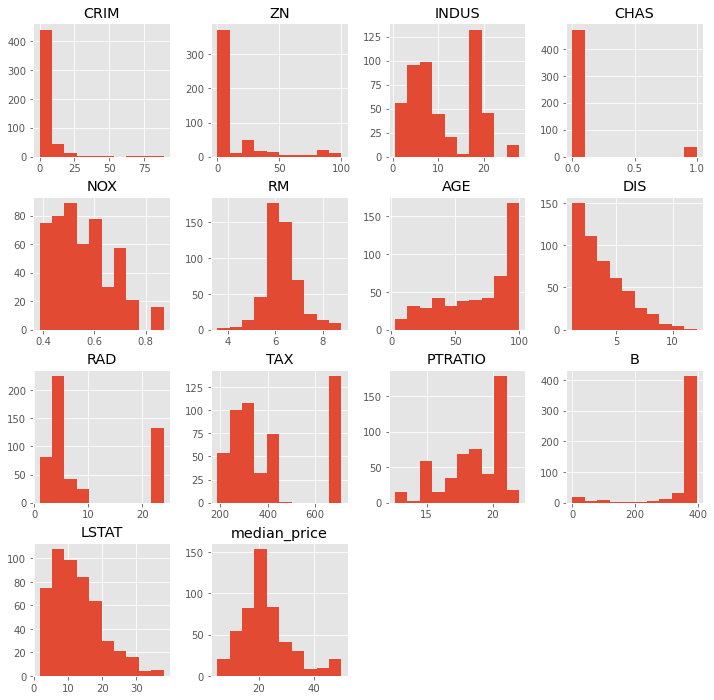

In [141]:
df.hist(figsize=(12,12))

<p style="font-size:20px;text-align:center">Interpretation and general thoughts</p><br>
<div style="border-style:solid;padding:10px">
    <b>
1)The majority of distributions of the variables in the dataset , are skewed , and very different from normal distribution .<br>
2)They also contain a lot of outliers they need to be handled <br>
3)the target variable which is "median_price" is skewed to the right a little bit  because of some outliers<br>

<font color="red"><b>in multiple linear regression, it is not necessary for the dependent variable to be normally distributed. However, if the dependent variable is not normally distributed, it may be beneficial to transform it in order to stabilize the variance and improve the model's ability to make accurate predictions. This is because linear regression assumes that the residuals (errors) are normally distributed.</b></font>

-let's dig deeper,and  explore more these variables<b>
</div>

CRIM                AxesSubplot(0.125,0.71587;0.168478x0.16413)
ZN               AxesSubplot(0.327174,0.71587;0.168478x0.16413)
INDUS            AxesSubplot(0.529348,0.71587;0.168478x0.16413)
CHAS             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
NOX                AxesSubplot(0.125,0.518913;0.168478x0.16413)
RM              AxesSubplot(0.327174,0.518913;0.168478x0.16413)
AGE             AxesSubplot(0.529348,0.518913;0.168478x0.16413)
DIS             AxesSubplot(0.731522,0.518913;0.168478x0.16413)
RAD                AxesSubplot(0.125,0.321957;0.168478x0.16413)
TAX             AxesSubplot(0.327174,0.321957;0.168478x0.16413)
PTRATIO         AxesSubplot(0.529348,0.321957;0.168478x0.16413)
B               AxesSubplot(0.731522,0.321957;0.168478x0.16413)
LSTAT                 AxesSubplot(0.125,0.125;0.168478x0.16413)
median_price       AxesSubplot(0.327174,0.125;0.168478x0.16413)
dtype: object

<Figure size 864x432 with 0 Axes>

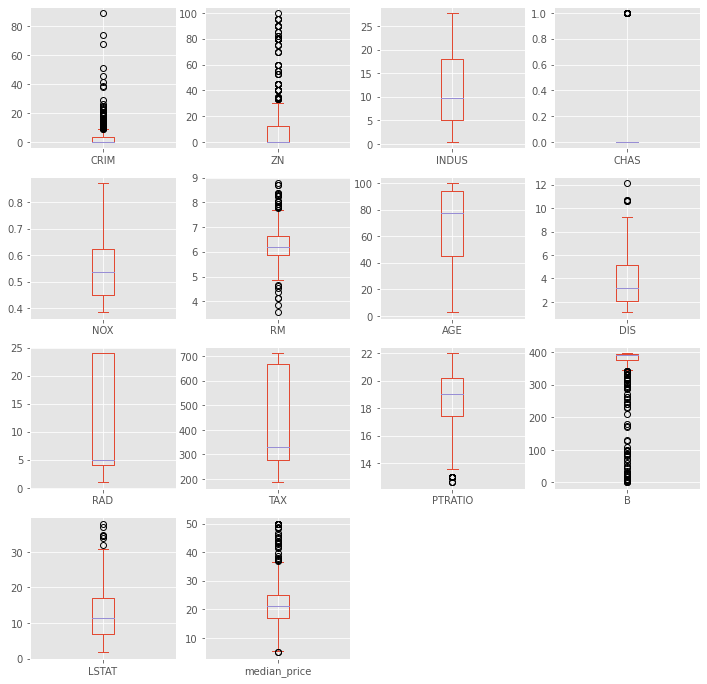

In [142]:
figure=plt.gcf()
figure.set_size_inches(12,6)
df.plot(kind="box",subplots=True,layout=(4,4),figsize=(12,12))

<p style="font-size:20px;text-align:center">General notes about outliers</p><br>
<div style="border-style:solid;padding:10px">
<b>
- Time to handle these outliers<br>
- Outliers are data points that are very different from the majoritity of datapoints in the dataset ,they can be a result of entry errors or other issue so they need to be at least investigated before deleting them .but deleting them is not always  a good practice,because we lose data and the effect of this is important when we have few data points (not in our case),and also they may contain some useful information , and creating a model without these data points may result in a misleading model . <br>
-outliers can be a result of  entry errors

- There is so many ways to handle outliers in the dataset : 
  - Trimming/Remove the outliers(not recommended)
  -  Quantile based flooring and capping
  -  Mean/Median imputation

-ZN,CRIM and B all clearly violating normal distribution and have many outliers. Therefore, introducing  these variables into our  model is more likely to bring  large variance for our model.

-we'll find out after which method to follow, but first let's divide our data into train and test before anything else .</b>
    </div>

In [143]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df.values, test_size=0.3, random_state=42)

list_col = columns.tolist()

list_col.append("price")

train_data = pd.DataFrame(train, columns=list_col)

test_data = pd.DataFrame(test, columns=list_col)

print(train_data.head())


       CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
0   0.02985  0.0   2.18   0.0  0.458  6.430  58.7  6.0622   3.0  222.0   
1   0.13158  0.0  10.01   0.0  0.547  6.176  72.5  2.7301   6.0  432.0   
2   0.17142  0.0   6.91   0.0  0.448  5.682  33.8  5.1004   3.0  233.0   
3   1.05393  0.0   8.14   0.0  0.538  5.935  29.3  4.4986   4.0  307.0   
4  15.57570  0.0  18.10   0.0  0.580  5.926  71.0  2.9084  24.0  666.0   

   PTRATIO       B  LSTAT  price  
0     18.7  394.12   5.21   28.7  
1     17.8  393.30  12.04   21.2  
2     17.9  396.90  10.21   19.3  
3     21.0  386.85   6.58   23.1  
4     20.2  368.74  18.13   19.1  


ShapiroResult(statistic=0.9254794120788574, pvalue=2.798519012012224e-12)


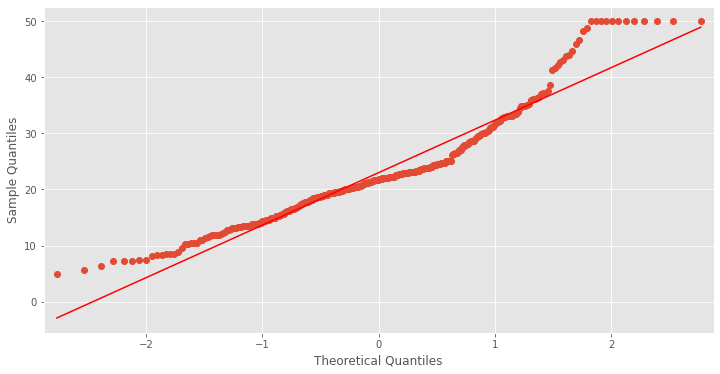

In [144]:
shapiro_test = stats.shapiro(train_data["price"])
print(shapiro_test)
plot = qqplot(train_data["price"], line="s")

- **As we can see the p value is so much lower (10^(-12)), and the line doesn't adjust so well the data points .**

ShapiroResult(statistic=0.9851663708686829, pvalue=0.0017903958214446902)
ShapiroResult(statistic=0.9881112575531006, pvalue=0.00839993916451931)


<AxesSubplot:ylabel='Density'>

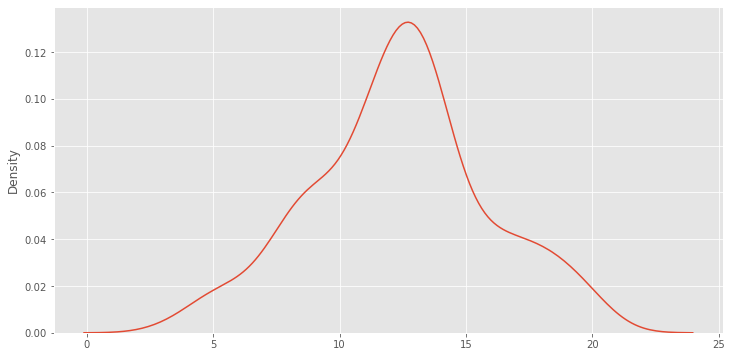

In [145]:
#the output variable is so skewed it's better to delete  outliers from the output variable,to approximate the normal distribution
q1, q3 = np.percentile(train_data.iloc[:,13].values, [25, 75])
# Calculate the interquartile range (IQR)
iqr = q3 - q1
# Define the outlier threshold as 1.5 times the IQR
outlier_threshold = 1.5 * iqr
# Find the indices of the outliers
outliers= (train_data.iloc[:,13]<q1 - outlier_threshold)|(train_data.iloc[:,13] > q3 + outlier_threshold)
index=train_data[outliers].index
train_data.drop(index , inplace=True)
train_data.reset_index(drop=True,inplace=True)
shapiro_test = stats.shapiro(train_data["price"])
print(shapiro_test)
#boxcox transformation
fitted_data, fitted_lambda = stats.boxcox(train_data["price"])
shapiro_test = stats.shapiro(fitted_data)
print(shapiro_test)
sns.kdeplot(fitted_data)

#this results when we deleted data before boxcox transformation,the pvalue has increased which is good, 
#it's better to delete outliers before using transforms
#we are going to stop here because transforming data a lot may result in high bias model 


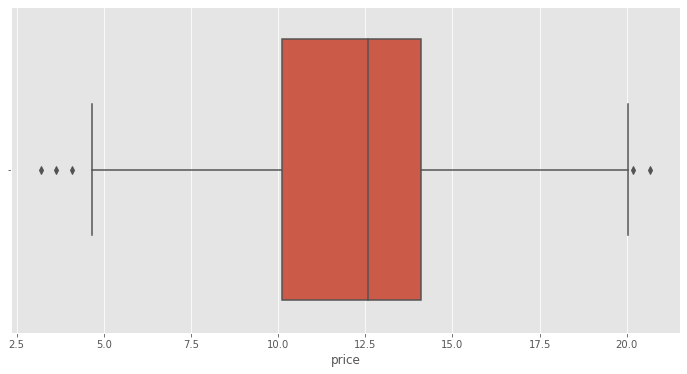

In [146]:
train_data["price"]=fitted_data
sns.boxplot(train_data["price"])
#there still be some outliers in the data to remove 
q1,q3=np.percentile(train_data["price"].values, [25, 75])
iqr=q3-q1
threshold=1.5*iqr
#indexes of outliers 
outliers=train_data[(train_data["price"]>threshold+q3)|(train_data["price"]<q1-threshold)].index








In [147]:
train_data.drop(outliers,inplace=True)


In [148]:
train_data.reset_index(drop=True,inplace=True)


<AxesSubplot:xlabel='price'>

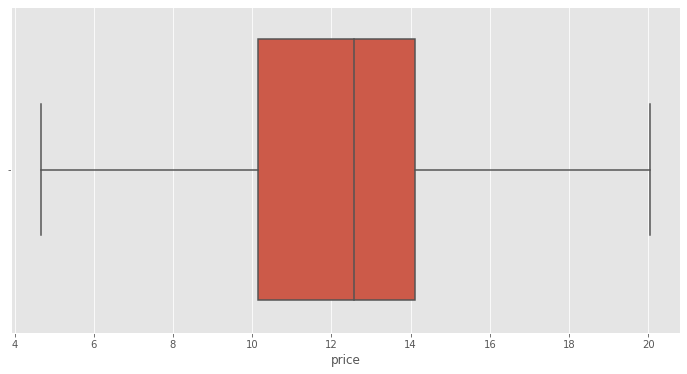

In [149]:
sns.boxplot(train_data["price"])



Let's do some median imputation to our variables , to reduce the effect of outliers
<div style="border-style:solid;border-color:black">
<u><b>Median imputation ?</b></u><br>
  - The median imputation consists of replacing the outliers of a variable with the median value of this variable , to reduce the effect of outliers ,it's useful technique so that we don't lose data  .
    </div>

In [150]:
y=train_data.apply(np.median,axis=0)
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
    
sample_outliers = detect_outliers_iqr(train_data["B"])
print("Outliers from IQR method: ", sample_outliers)

for i in range(len(train_data["B"])):
    if(train_data["B"][i] in sample_outliers):
        train_data["B"][i]=y["B"]


Outliers from IQR method:  [0.32, 2.6, 3.5, 3.65, 7.68, 18.82, 21.57, 22.01, 24.65, 27.25, 43.06, 48.45, 50.92, 60.72, 68.95, 70.8, 81.33, 83.45, 88.63, 96.73, 109.85, 131.42, 169.27, 172.91, 210.97, 227.61, 232.6, 240.16, 248.31, 262.76, 272.21, 285.83, 291.55, 292.29, 297.09, 302.76, 304.21, 306.38, 316.03, 318.01, 318.43, 318.75, 330.04, 332.09, 334.4, 338.63, 338.92, 341.6, 341.6, 343.28, 344.91]


<AxesSubplot:xlabel='B'>

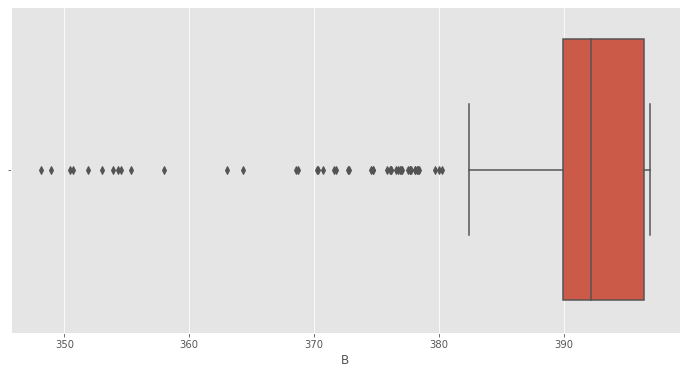

In [151]:

sns.boxplot(train_data["B"])


- The data is highly skewed it's better to transform it , this may result in unstable model , we need to reduce this variability.
-Note: some learning datasets contain attributes that need severe modifications before they can be used to do predictive modeling.

- So to reduce it variability , that means reduce skewness , and also handle outliers.<br>
-one of the solutions is transforming our data , like log transform, or boxcox , since we have so many outliers and skewed data , we'll rely in many parts of our analysis on boxcox transform .<br>
<div style="border-style:solid;border-color:black">
<b><u>What is boxcox transformation anyway ?  </u></b><br><br>
   - boxcox transformation is a mathematical function applied on skewed data,so they can approximate more a normal distribution , it has a parameter which is $\lambda$,for each value of this parameter , we have a new function to evaluate ,There are a few different methods for determining the appropriate value of $\lambda$ for a given dataset. One method is to plot the data and visually inspect the plot to see what value of lambda might work best. Another method is to use a statistical test, such as the Anderson-Darling test, to determine the appropriate value of $\lambda$.<br><br>
   - $\lambda$ varies from -5 to 5<br><br>
   - In our case ,  the library of scipy will select which one suits the data  well, without getting into details.<br><br>
   - And also,we can reverse this transformation using the following importation "<em>from scipy.special import inv_boxcox</em>" because it's important to reverse transformations<br><br>
   - Here is the mathematical formula of the transformation : <br><br>
   $$y(\lambda)=\left\{\begin{matrix}y^{\lambda}-1\mspace{5mu}if\mspace{5mu}\lambda\neq 0
\\ 
log(y)\mspace{5mu}if\mspace{5mu} \lambda=0
\end{matrix}\right.$$<br><br>
    -<font color="red">Pay attention!!, the data must be positive </font><br><br>
    <center>
    <a href="https://towardsdatascience.com/notes-about-the-box-cox-transformations-18d7cd594265" style="text-align:center">For more informations about the box-cox transformation</a> </center>
    <center><br>
    <a href="https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45">General techniques to treat skewed data</a></center></div>


In [152]:
fitted_data1, fitted_lambda1 = stats.boxcox(train_data["B"])
shapiro_test = stats.shapiro(fitted_data1)
print("pvalue: "+str(shapiro_test[1]))


pvalue: 1.0


**if the pvalue is greater that 0.05 that means we have data that approximates so well the normal distribution**

<AxesSubplot:xlabel='CRIM', ylabel='Density'>

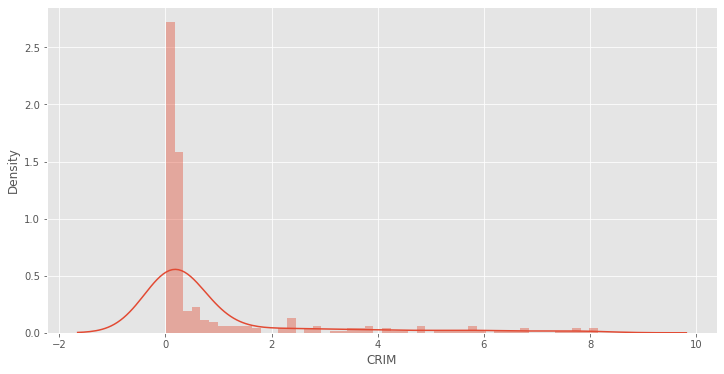

In [153]:
train_data["B"]=fitted_data1
outliers.clear()
##CRIM column
sample_outliers = detect_outliers_iqr(train_data["CRIM"])
for i in range(len(train_data["CRIM"])):
    if(train_data["CRIM"][i] in sample_outliers):
        train_data["CRIM"][i]=y["CRIM"]


sns.distplot(train_data["CRIM"])
 


In [154]:
fitted_data2, fitted_lambda2 = stats.boxcox(train_data["CRIM"])
shapiro_test = stats.shapiro(fitted_data2)
print("pvalue: "+str(shapiro_test[1]))

pvalue: 1.6860696632647887e-05


<AxesSubplot:ylabel='Density'>

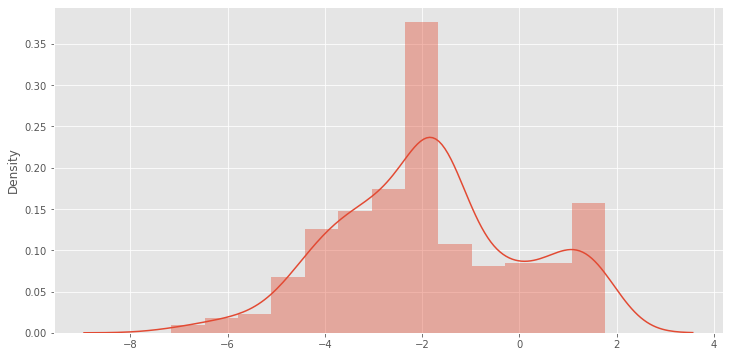

In [155]:
sns.distplot(fitted_data2)

**The Boxcox transform  didn't perform well on this data  , let's look for a log transformation**

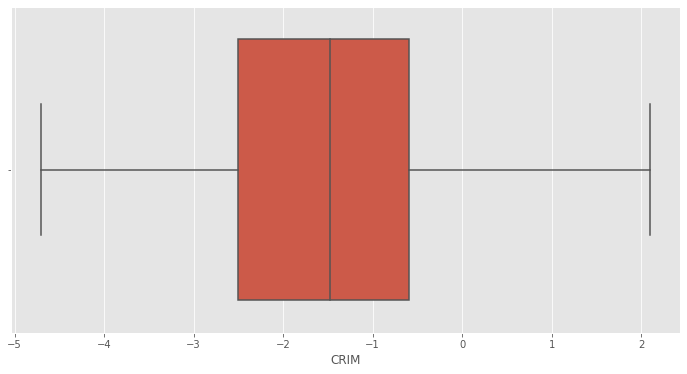

In [156]:

sns.boxplot(np.log(train_data["CRIM"]))

train_data["CRIM"]=np.log(train_data["CRIM"])





**-Notice we reduced the skewness in this variable so much , and also reduced the outliers , the median imputation didn't work so well**<br>
**-let's look now after the RM variable**

<AxesSubplot:xlabel='RM'>

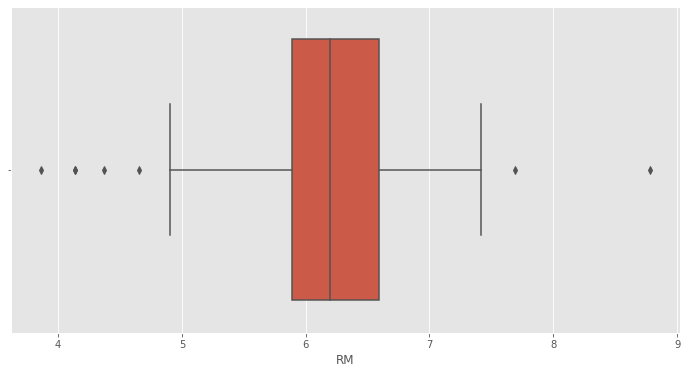

In [157]:

sns.boxplot(train_data["RM"])

**-The RM column doesn't contain many outliers, and it's not skewed,let's remove these outliers so they don't affect our model,there is no harm if we remove them because there are few of them if we take in consideration the size of data in our hands.**<br>



In [158]:
q1, q3 = np.percentile(train_data["RM"], [25, 75])
iqr = q3 - q1
threshhold = 1.5 * iqr
outliers = train_data[(train_data["RM"] > q3 + threshhold) |
                      (train_data["RM"] < q1 - threshhold)].index
train_data.drop(outliers, inplace=True)
train_data.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='RM'>

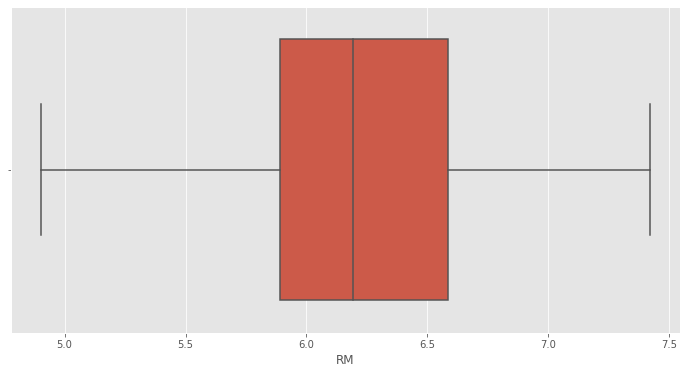

In [159]:
sns.boxplot(train_data["RM"])




- **Let's look now after the ZN column .**

<AxesSubplot:xlabel='ZN'>

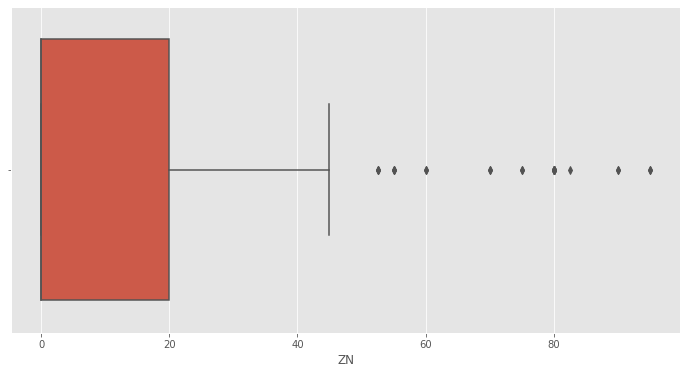

In [160]:

sns.boxplot(train_data["ZN"])


- **The ZN column contain many outliers , and skewed , and also it contains negative terms , so performing a boxcox transformation or log transformation won't work,the less thing we can do is remove outliers,but it didn't work well,so we'll try to run a transformation  from scipy.stats library , which is "yeo-johnson" transformation , it is similar to "box-cox" transform but it is applied also to negative values**

AxesSubplot(0.125,0.125;0.775x0.755)


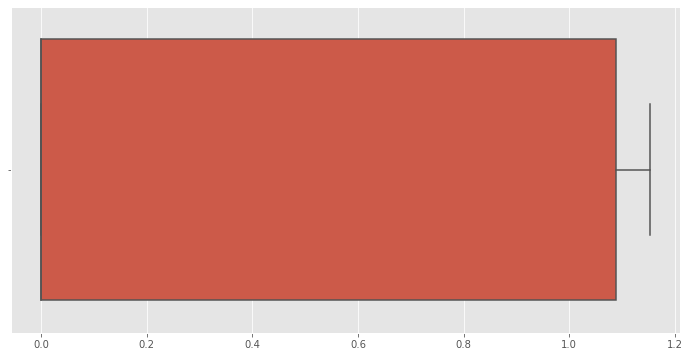

In [161]:

k=train_data["ZN"].values
k=k.reshape(len(k),1)
xt, lmbda = stats.yeojohnson(train_data["ZN"].values)

#The lambda parameter is for reverting the transformation, bcs whenever we perform a transformation we have to revert it .
print(sns.boxplot(xt))

In [162]:
train_data["ZN"]=xt

- **Now we have data without outliers , and without even dropping variables some data points**
- **Eventhough the data is skewed it's not a problem,it is not necessary to have symmetrical distributions in independant variables,because in regression models we don't assume this in independant variables , we transform data into symmetrical ones just to reduce variability and improve the model performance**
-<a href="https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/">For more informations about handling outliers</a> 

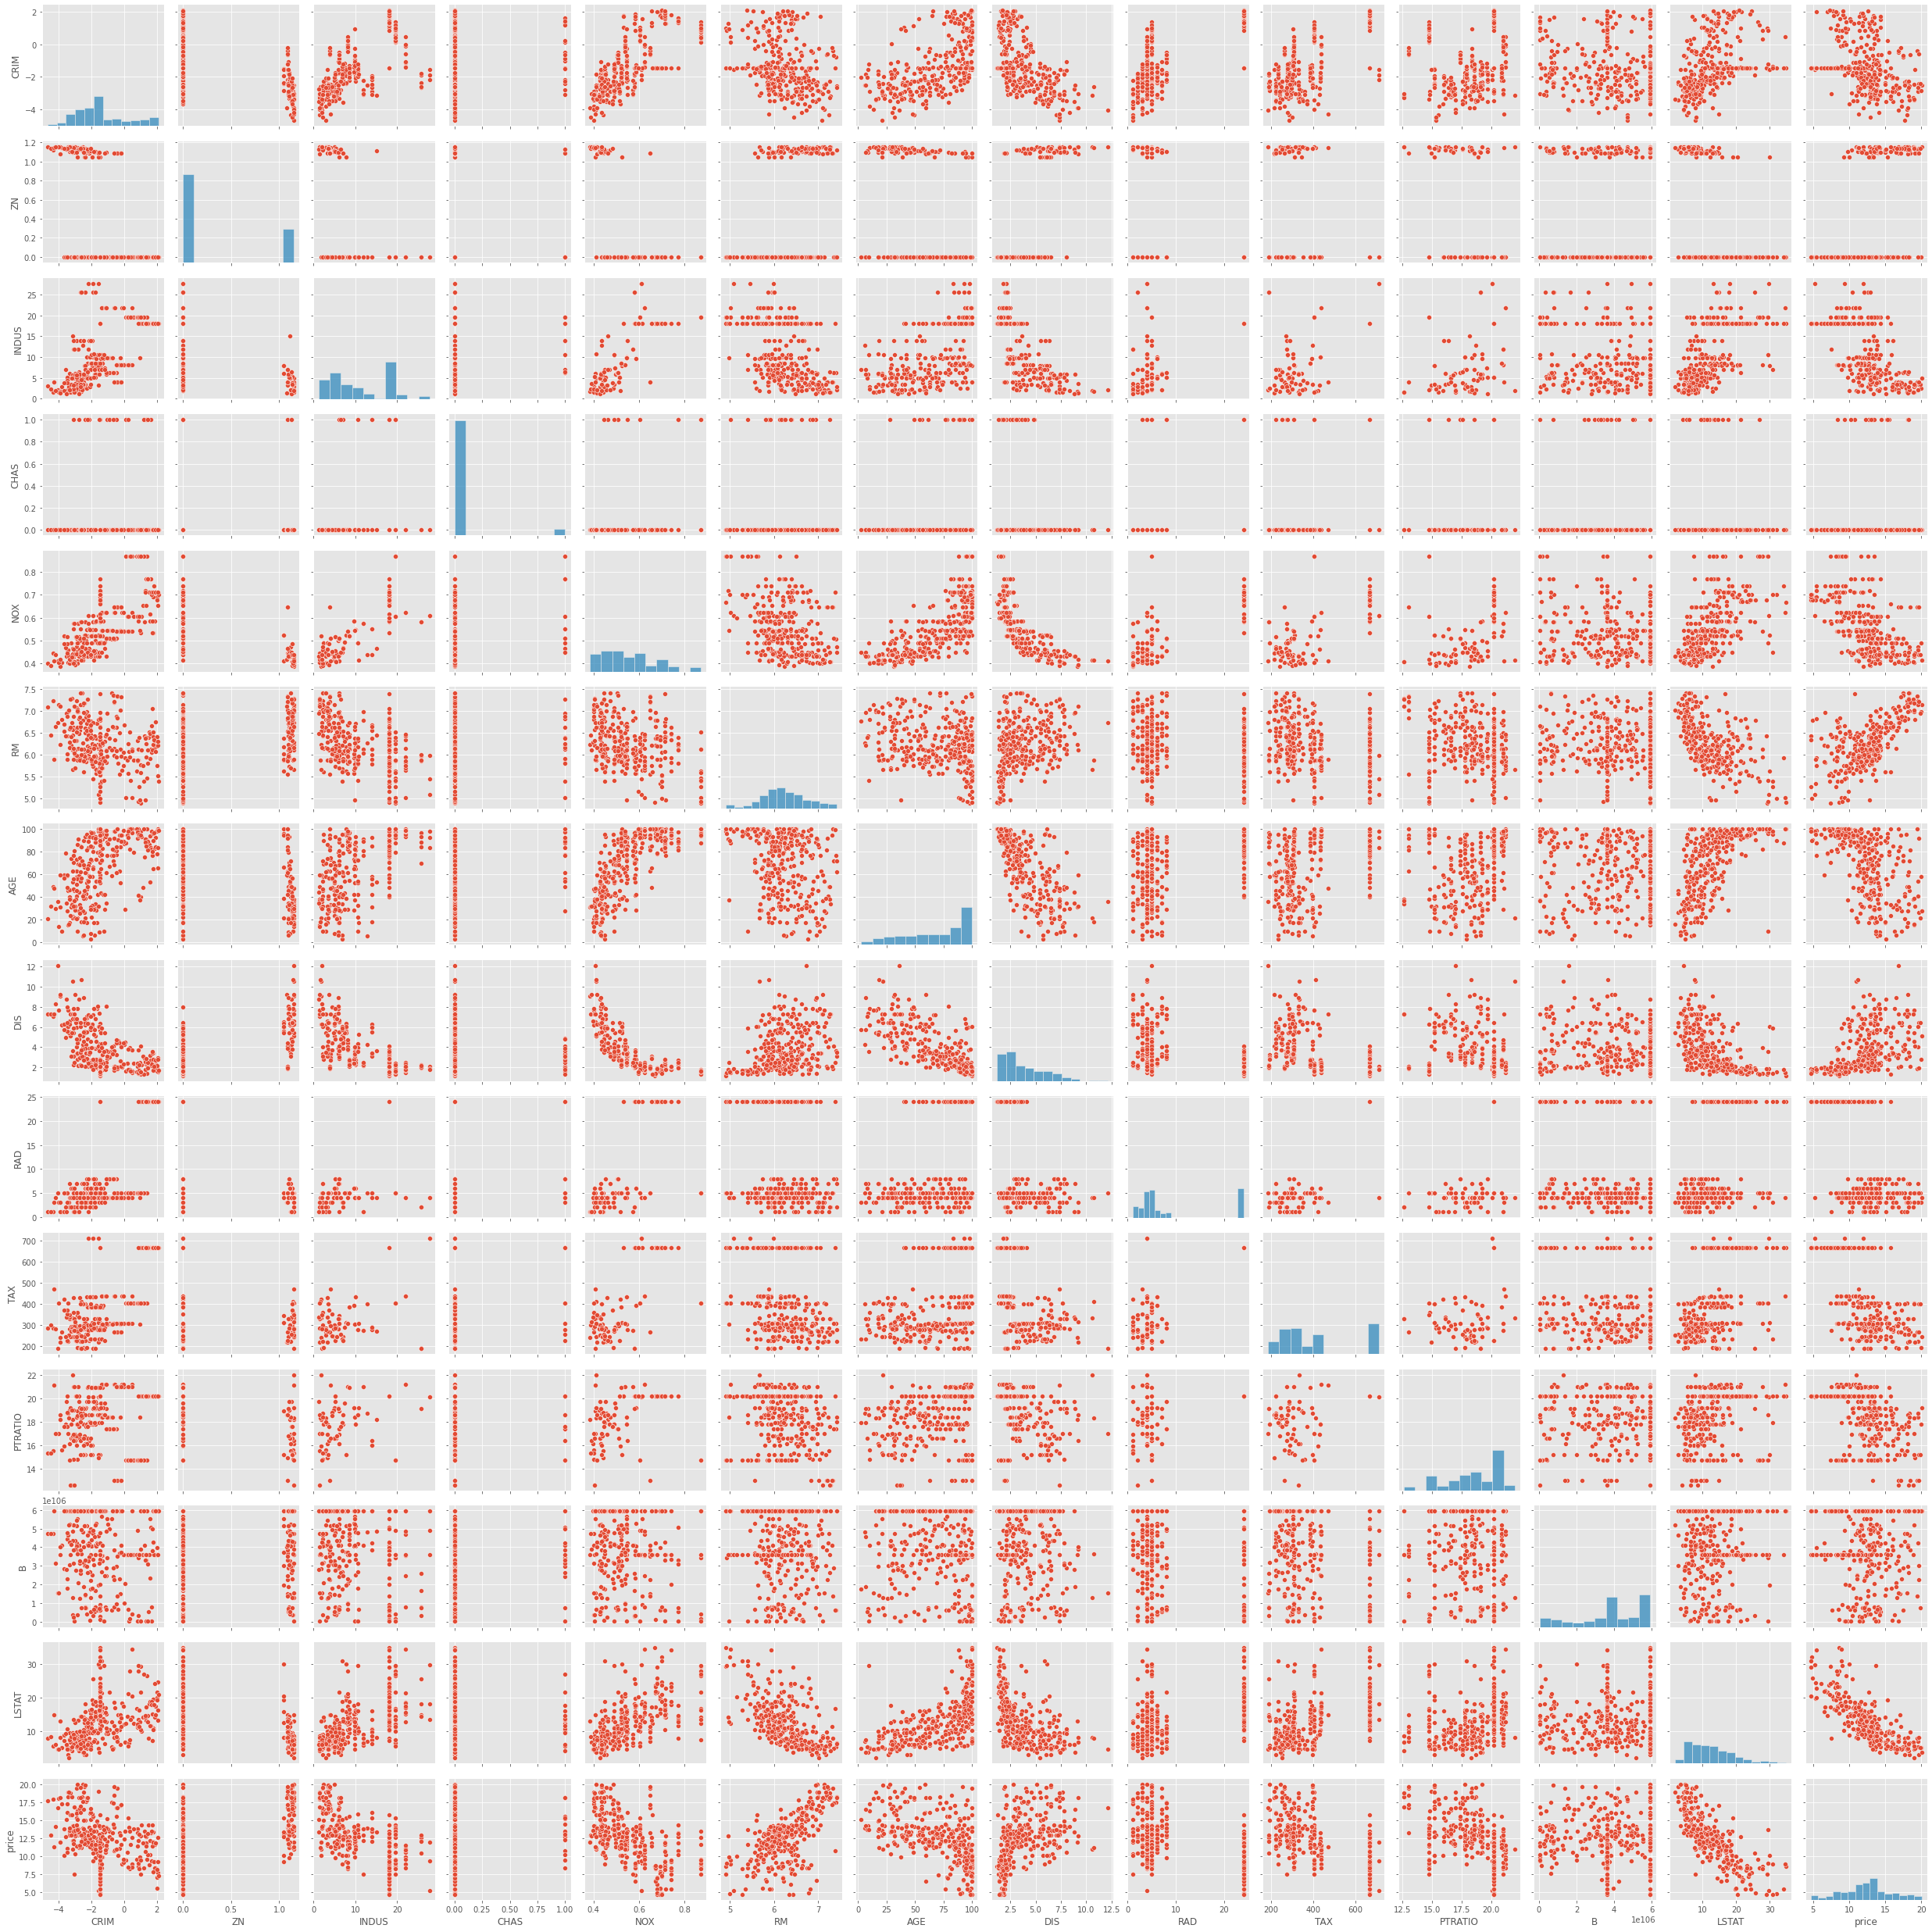

In [110]:
sns.pairplot(data=train_data)

- **from , the last figure , we see that there is a high correlation between LSTAT  and RM , those are important to include in out model  which is obvious , bcs the price of a house may increase based on number of rooms and space in general , also for lower status areas we find cheaper houses that what explains the negative relationship between "LSTAT" variable and "price".**

- **DIS, LSTAT showing nonlinear correlations with "price",so we may need to think about adding some non linear components in our model.**

 -<a href="https://www.youtube.com/watch?v=MnEa_xHm1j8">For more info about non linear components,Check this video of "Andew ng"</a>



### Check for multicolinearity

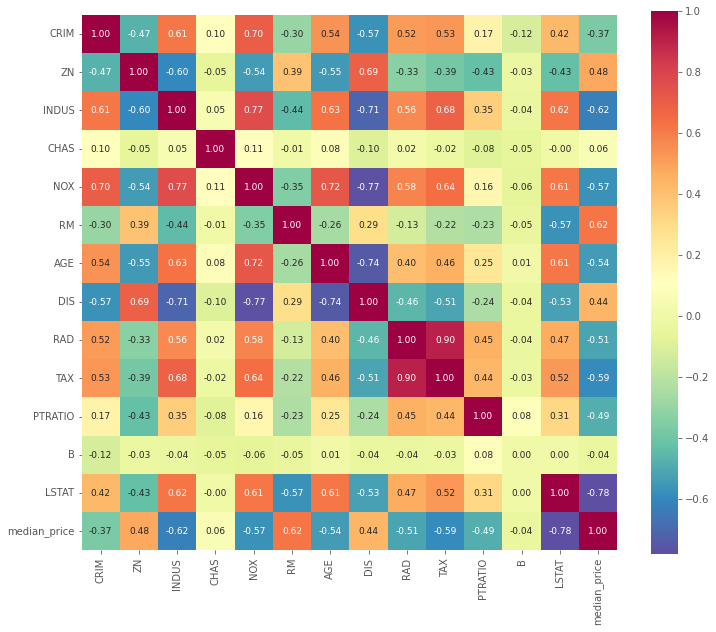

In [163]:
corrmat = train_data.corr()
figure=plt.gcf()
figure.set_size_inches(12,10)
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 9}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")

## Drop unecessary columns
<u><p style="font-size:25px;text-align:center">General notes about multicolinearity</p></u><br>
<div style="border-style:solid;padding:10px">
- <b>From the above figure , the data suffers a lot from multicolinearity, linear_correlation(TAX,RAD)=0.90 which is huge , we may need to remove one of the variables , because we need  independance as much as we can to build an OLS based model(ordinary least squares)</b><br><br>
- <b>The multiple linear regression model assumees that , variables are independant , that means there is no linear correlation between variables</b><br><br>
- <b>If the data suffers from multicolinearity , the matrix "$X^{t}X$" cannot be inverted ,since we are relying on it to approximate our model and we are not using an optimisation algorithm like "Gradient descent" or something else , these are called normal equations .</b><br><br>
- <b>In a high multicolinearity model, it is harder to interpret coefficients,because the model is unstable and fluctuate,In another way you can't conclude the scale of changes to the output if one of your predicting variables changes by 1 unit.</b><br><br>
- <b>And also it may cause the model to overfit</b><br><br>
- <b>In our case,the variables are very correlated , so we are more likely to run a PCA, to reduce this multicolinearity</b><br><br>
<center> <a href="https://www.youtube.com/watch?v=NN7mBupK-8o">For more infos about normal equations,check this video</a></center>

</div>

In [164]:
#drop RAD column
RAD=train_data["RAD"]
train_data.drop(["RAD"],inplace=True,axis=1)


In [165]:
K=list(train_data["price"])

### Find model
<div style="border-style:solid;padding-left:10px"><b><u>intuition :</u><br>
-we want to predict the median house price of house in boston area, based on a multiple linear regression model<br>

-The relationship between lstat variable and price seems to be a non linear one we may transform it if we use it as a predictor variable.<br>


-The categorical variable chas has a significant effect on the median house price, and that's logical to include this variable in our model, because it's a desirable place in general .<br>
-Also the status of the population plays an important role , because in high status populated areas , the price of houses is mainly high .<br>
-The variable distance , is important also, because it is a privilege for people , to be near from employement places , and services , we remark that there is a positive correlation between distance and price variable which is a good sign.<br>
-about the variable crime rate,  people don't prefer to live in high crime rates area , so safety is an important factor .<br>

-the more valuable is a place the more , we find high taxes .<br>
-but in general , the taxes depends on the local taxe rate , and the services provided by the governement .</b></div>






### Model training
- **In this phase we are going to test multiple  models , we'll use a metric to evaluate each model** 
- **The input is a pandas series.**
- **In this function we add constant variable into our model.sometimes we may not need it so we don't add it**
- **Let's take an example , if we already know that the response should be zero when all the predictors are equal to zero,in this case you could fit a model without this constant**
- **Or also :if you have strong reason to believe that the response is a linear function of the predictor variables and there is no need for an intercept.**

In [166]:
#let's perform the same transformations done in the previous train data for the test data , because we need it 
test_data.drop(["RAD"],inplace=True,axis=1)



### Apply the same transformations on test data 

In [167]:
#ZN column, has "fitted_lambda1" as a parameter
#the black variable has "fitted_lambda1" as a parameter
#the price column has "fitted_lambda" as a parameter

test_data["ZN"]=stats.yeojohnson(test_data["ZN"],lmbda=lmbda)
test_data["CRIM"]=np.log(test_data["CRIM"])
test_data["B"]=stats.boxcox(test_data["B"], lmbda=fitted_lambda1)
test_data["price"]=stats.boxcox(test_data["price"],lmbda=fitted_lambda)




In [168]:
test_data.iloc[:,:12]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-2.388361,-0.000000,4.05,0.0,0.510,6.416,84.1,2.6463,296.0,16.6,5.112697e+106,9.04
1,-2.874577,1.127011,6.41,1.0,0.447,6.758,32.9,4.0776,254.0,17.6,5.924610e+106,3.53
2,-2.246772,-0.000000,27.74,0.0,0.609,5.983,98.8,1.8681,711.0,20.1,2.884555e+106,18.07
3,-2.389887,-0.000000,10.81,0.0,0.413,6.065,7.8,5.2873,305.0,19.2,3.141874e+106,5.52
4,1.627311,-0.000000,18.10,0.0,0.713,6.297,91.8,2.3682,666.0,20.2,1.680593e+106,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...
147,2.274616,-0.000000,18.10,0.0,0.740,6.406,97.2,2.0651,666.0,20.2,1.846466e+106,19.52
148,-0.011637,-0.000000,8.14,0.0,0.538,5.813,100.0,4.0952,307.0,21.0,4.619836e+106,19.88
149,-0.640688,-0.000000,6.20,0.0,0.504,8.725,83.0,2.8944,307.0,17.4,1.200941e+106,4.63
150,1.719381,-0.000000,18.10,0.0,0.713,6.436,87.9,2.3158,666.0,20.2,6.848799e+81,16.22


In [169]:
test_y = test_data["price"].values
test_x = test_data.iloc[:, :12]

#function for checking multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


def vif_mutual(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [vif(df.values, i) for i in range(len(df.columns))]
    print(vif_data.iloc[:, :])


#metric to calculate errors
def rmse_met(x, y):
    return np.sqrt(np.mean((x - y)**2))


#Function for training
def train_multi(X, Y, test):
    X = sm.add_constant(X)
    test = sm.add_constant(test)
    model = sm.OLS(Y, X)
    fitted_model = model.fit()
    predictions = fitted_model.predict(test)
    evaluation = rmse_met(predictions, test_y)
    return fitted_model, evaluation, predictions

- **The most logical variables to include are "RM","CRIM","LSTAT","DIS","PTRATIO",because these factors are more significantly
related to output variable , based on domain knowledge,these variables will be our starting point**

In [170]:

col_select=["RM","CRIM","LSTAT","DIS","PTRATIO"]
model1,eval1,predic=train_multi(train_data[col_select],train_data.iloc[:,12],test_x[col_select].values)

In [171]:
dic={"prediction":predic,"reality":test_y}
result=pd.DataFrame(dic)
print(result)

     prediction    reality
0     14.486897  13.669594
1     16.194870  17.835840
2      9.907260   8.467646
3     13.969650  13.274940
4     10.423827   9.831438
..          ...        ...
147    9.920582  10.363315
148    8.721762   8.964621
149   18.783816  25.483072
150   10.924443   8.854796
151   10.566953   7.906684

[152 rows x 2 columns]


eval_env: 1


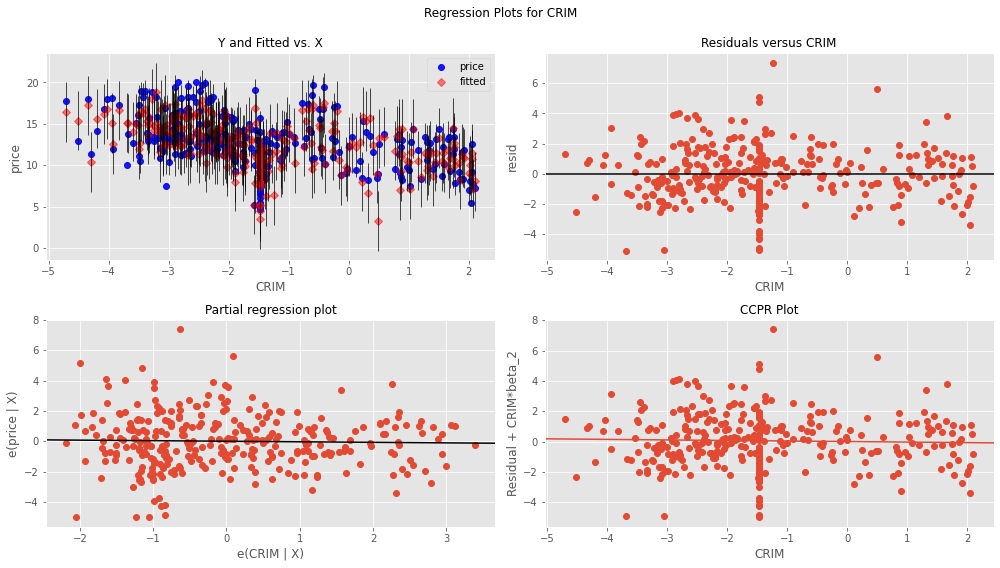

In [172]:
fig = plt.figure(figsize=(14, 8))
# creating regression plots
fig=sm.graphics.plot_regress_exog(model1, 'CRIM', fig=fig)

In [173]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     156.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.22e-82
Time:                        13:45:54   Log-Likelihood:                -635.24
No. Observations:                 318   AIC:                             1282.
Df Residuals:                     312   BIC:                             1305.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9288      1.943      7.168      0.0

In [174]:
shapiro_test = stats.shapiro(model1.resid)
print(shapiro_test)

ShapiroResult(statistic=0.9863300323486328, pvalue=0.004170368425548077)


- **We tried to reduce skewness and the effect of outliers as much as we can , to fit the assumptions , but in real life problems we can't get perfect data,and it is folly to meet perfectly all the assumptions**

In [175]:
#there is some high multicolinearity in this data so we'll try to fit another model after getting rid of insignificant variables
vif_mutual(train_data[col_select])

   feature        VIF
0       RM  53.001825
1     CRIM   2.761290
2    LSTAT   7.126432
3      DIS   7.135494
4  PTRATIO  59.922786


- **the durbin watson statistique is superior to 2 , so , the independance of the $1^{st}$ degree is checked, and also , based on partial residual plots , the data seems to be centered around 0 , and have fixed variability** 

In [176]:
col_select1 = ["RM", "CRIM", "LSTAT", "PTRATIO"]
model2, eval2, predic2 = train_multi(train_data[col_select1],
                                     train_data.iloc[:, 12],
                                     test_x[col_select1].values)

In [177]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     195.6
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           8.19e-84
Time:                        13:46:03   Log-Likelihood:                -635.24
No. Observations:                 318   AIC:                             1280.
Df Residuals:                     313   BIC:                             1299.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9665      1.882      7.420      0.0

In [178]:
vif_mutual(train_data[col_select1])
print("")
print("evaluation2: " + str(np.round(eval2, 4)))
print("evaluation1: " + str(np.round(eval1, 4)))
#the second model is performing better than the first one

   feature        VIF
0       RM  48.432289
1     CRIM   2.206614
2    LSTAT   6.591140
3  PTRATIO  59.798266

evaluation2: 2.4632
evaluation1: 2.4648


In [179]:
#we still suffer from multicolinearity, so for that let's get rid from other insignificant variable
col_selec2 = ["RM", "LSTAT", "PTRATIO"]
model3, eval3, predic3 = train_multi(train_data[col_selec2],
                                     train_data.iloc[:, 12],
                                     test_x[col_selec2].values)

In [180]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     261.3
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           5.40e-85
Time:                        13:46:33   Log-Likelihood:                -635.39
No. Observations:                 318   AIC:                             1279.
Df Residuals:                     314   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0252      1.877      7.472      0.0

In [181]:
vif_mutual(train_data[col_selec2])
print("")
print("evaluation3: "+str(np.round(eval3,4)))
print("evaluation2: "+str(np.round(eval2,4)))
print("evaluation1: "+str(np.round(eval1,4)))

   feature        VIF
0       RM  45.061291
1    LSTAT   5.936141
2  PTRATIO  59.783047

evaluation3: 2.4642
evaluation2: 2.4632
evaluation1: 2.4648


- **we still got the problem of multicolinearity in data,let's run another models,for now the second model stays the best** 

-**If you obtain a model that suffers from multicollinearity but performs well on test data, it can be considered a good model in terms of its predictive performance. However, multicollinearity can indicate that there may be problems with interpreting the coefficients of the model.**<br><br>
-**When there is multicollinearity, the estimates of the regression coefficients can be unstable and sensitive to small changes in  the data. This can make it difficult to determine the relative importance of each predictor variable in the model and can make it difficult to interpret the effect of a change in one predictor on the response. In this sense, multicollinearity is a problem for inference rather than prediction.**










In [200]:
col_selec9 = ["RM", "LSTAT", "PTRATIO","CRIM","CHAS","NOX"]
model9, eval9, predic9 = train_multi(train_data[col_selec9],
                                     train_data.iloc[:, 12],
                                     test_x[col_selec9].values)
print(model9.summary())
print(eval9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     145.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.11e-87
Time:                        14:47:54   Log-Likelihood:                -621.73
No. Observations:                 318   AIC:                             1257.
Df Residuals:                     311   BIC:                             1284.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1695      1.935      8.871      0.0

In [185]:
pval=stats.shapiro(model9.resid)
vif_mutual(train_data[col_selec9])
print(pval)

   feature        VIF
0       RM  77.373306
1    LSTAT  10.122604
2  PTRATIO  66.689588
3     CRIM   3.523905
4     CHAS   1.095401
5      NOX  57.792572
6      TAX  14.547189
ShapiroResult(statistic=0.9842379093170166, pvalue=0.001473694108426571)


-**These are some notes after running some models,in addition to the base model of ("RM","LSTAT","CRIM","PTRATIO"):**
     


- Base model : perfomance : 2.4632  | adj rsquared:0.711 | Fstat : 195.6
- with CHAS |perfomance : 2.45707 | adj rsquared:0.712 | Fstat : 157,4
- with ZN |perfomance : 2.476 | adj rsquared:0.712 | Fstat :  157.1
- with DIS|performance:2.469 | adj rsqured:0.710 | Fstat : 156.0
- with CRIM|CHAS : performance :2.456 | adj rsquared : 0.712 | Fstat :  157.4
- with CRIM|CHAS|NOX: performance :2.425 | adj rsquared : 0.732 | Fstat : 145.7,besides it has the lowest AIC,we'll use this model.

<u><b>What is AIC : </b></u><br><br>
<p>
AIC (Akaike Information Criterion) is a measure of the relative quality of a statistical model. It is used to determine which of several models is most likely to be the true, underlying model for the data.<br>
AIC does not assume anything about the output data, it uses the likelihood function to estimate the goodness of the fit of the model and penalizes the number of parameters. More specifically, AIC is defined as:<br>

AIC = 2k - 2ln(L),where k is the number of parameters in the model and L is the maximum likelihood of the model.
The model with the lowest AIC is considered to be the best fit for the data. It is a trade-off between goodness of fit and number of parameters</p>






- **LSTAT seems to show non linear relationship with price variable,w'ell use a transformation on LSTAT variable a 'log transformation"**

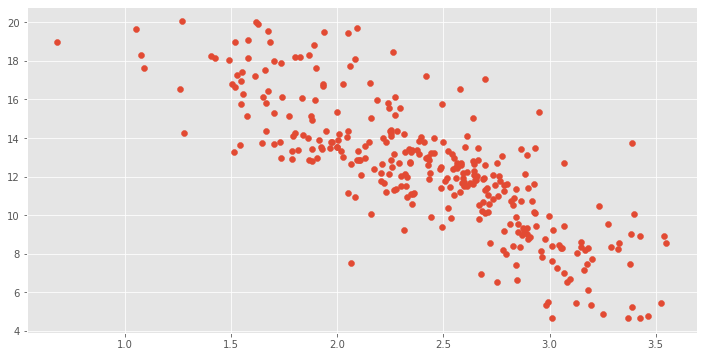

In [205]:
df_tr=train_data[col_selec9].copy()
#use of copy so it don't affect the first dataframe
df_tr["LSTAT"]=np.log(df_tr["LSTAT"])
plt.scatter(df["LSTAT"],train_data.iloc[:, 12])
df_ts=test_x[col_selec9].copy()
df_ts["LSTAT"]=np.log(df_ts["LSTAT"])


In [206]:
model10, eval10, predic10 = train_multi(df_tr[col_selec9],
                                     train_data.iloc[:, 12],
                                     df_ts[col_selec9].values)
print(model10.summary())
print(eval10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     153.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           6.07e-90
Time:                        14:59:04   Log-Likelihood:                -615.32
No. Observations:                 318   AIC:                             1245.
Df Residuals:                     311   BIC:                             1271.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0812      2.056     11.224      0.0

In [210]:
pval=stats.shapiro(model10.resid)
#sns.kdeplot(model10.resid)
pval

ShapiroResult(statistic=0.9914230108261108, pvalue=0.061687223613262177)

In [215]:
#let's run a PCA on this model
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
components = pca.fit_transform(df_tr[col_selec9].values)
componentsDf_tr = pd.DataFrame(data=components,
                               columns=[
                                   'component1', 'component2', 'component3',
                                   'component4', 'component5', 'component6'
                               ])

In [216]:
pca = PCA(n_components=6)
components = pca.fit_transform(df_ts[col_selec9].values)

componentsDf_ts = pd.DataFrame(data=components,
                               columns=[
                                   'component1', 'component2', 'component3',
                                   'component4', 'component5', 'component6'
                               ])

In [221]:
model10pca, eval10pca, predic10pca = train_multi(componentsDf_tr,
                                                 train_data.iloc[:, 12],
                                                 componentsDf_ts.values)
print(model10pca.summary())
print("error in the model :"+str(eval10pca))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     153.8
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           6.07e-90
Time:                        15:18:20   Log-Likelihood:                -615.32
No. Observations:                 318   AIC:                             1245.
Df Residuals:                     311   BIC:                             1271.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4422      0.095    130.969      0.0

In [222]:
vif_mutual(componentsDf_ts)
print(stats.shapiro(model10pca.resid))


      feature  VIF
0  component1  1.0
1  component2  1.0
2  component3  1.0
3  component4  1.0
4  component5  1.0
5  component6  1.0
ShapiroResult(statistic=0.9914230108261108, pvalue=0.061687223613262177)


- **As we can see , the model has no multicolinearity , it respect normality(Shapiros's test : 0.061) , independance of residuals(durbin _watson : 2.173>2),and it has the lowest AIC , and also it is globally significant ,this is the best model until now** 
- **Also another remark ,the variable "CRIM" wasn't significant in first models but when combined with another variables it became significant.**
- **Besides,performing PCA  has an issue , variables lose their identity , and they are hard to interpret,keeping the first model is also good**
- **let's try Random forest regressor,or another algorithms,one question you may ask , is do u need to use these algorithmes , on all set of features , or filtered ones the response is as follows :**
  - **if you have a model that is performing well on a set of features and you want to try another model, it's best to start by using the same set of features. This allows you to compare the performance of the two models on an apples-to-apples basis and determine whether the new model is an improvement over the old one.**

In [224]:
from sklearn.ensemble import RandomForestRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rf = RandomForestRegressor(n_estimators=500, max_depth=7,random_state=42)
rf.fit(df_tr[col_selec9], train_data.iloc[:, 12])
rf_pred=rf.predict(df_ts[col_selec9])



In [227]:
rf_RMSE_test_error=sqrt(mean_squared_error(test_y, rf_pred))
print(f"rf_Test_error: {rf_RMSE_test_error:.2f}")
#it is clear that it performed better than the multiple linear regression we created 

rf_Test_error: 2.24


- Let's try decision tree classifier 

In [228]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(random_state=42, max_depth = 5)
dtr_model.fit(df_tr[col_selec9],train_data.iloc[:, 12])
DT_pred = dtr_model.predict(df_ts[col_selec9])


In [230]:
DT_RMSE_test_error=sqrt(mean_squared_error(test_y, DT_pred))
print(f"DT_RMSE_Test_error: {DT_RMSE_test_error:.2f}")

DT_RMSE_Test_error: 2.46


In [248]:
arr=np.array([DT_RMSE_test_error,rf_RMSE_test_error,eval10])

errors_RMSE=pd.DataFrame(arr)
errors_RMSE.columns,errors_RMSE.index=["RMSE"],["Decision tree","Random forest classifier","Multiple linear regression"]



- **The models we used so far after regression are non parametric they don't suppose anything about the distribution of data**

In [249]:
errors_RMSE

,RMSE
Decision tree,2.462262
Random forest classifier,2.236508
Multiple linear regression,2.308676


### Conclusion : 

- The best performing model was Random forest classifier based on RMSE .
- in  EDA , the data is very complex and not perfect , it requires a lot of transformations , and manipulations , so they can be fitted with a model .
- it's highly recommended to respect assumptions of models as much as you can .
- Without assummptions , your statistical tests doesn't mean nothing .
- The interpretability of the model matters .
- A stable model,has low multicolinearity , respect assumptions , and generalize well the data 
- There is no perfect model , we create specific model ,for specific purposes , every model serves a certain goal 
- And also the metrics used to assess models , are various like MAPE,RMSE,R^2,Fstat.. ,chosing the right metric depends on the context .
- The variance is our friend and our ennemy at the same time , data with no variance and no variability , doesn't contain any intersting information , because it is so simple to understand and to model , besides data with variance contains useful pattern(information) and some noise,it needs our statistical techniques to reveal and make use of this pattern,and also it is our ennemy because high variance data is hard to model .and interpret .



SGHIOURI Yahya
